In [21]:
import os
import pandas as pd
import numpy as np

# 1. В новому ноутбуці завантаж доданий файл в DataFrame Pandas та створи такі візуалізації:

DATA_FILE = os.path.join("data", "facebook_ads_data.csv")
df = pd.read_csv(DATA_FILE)

df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


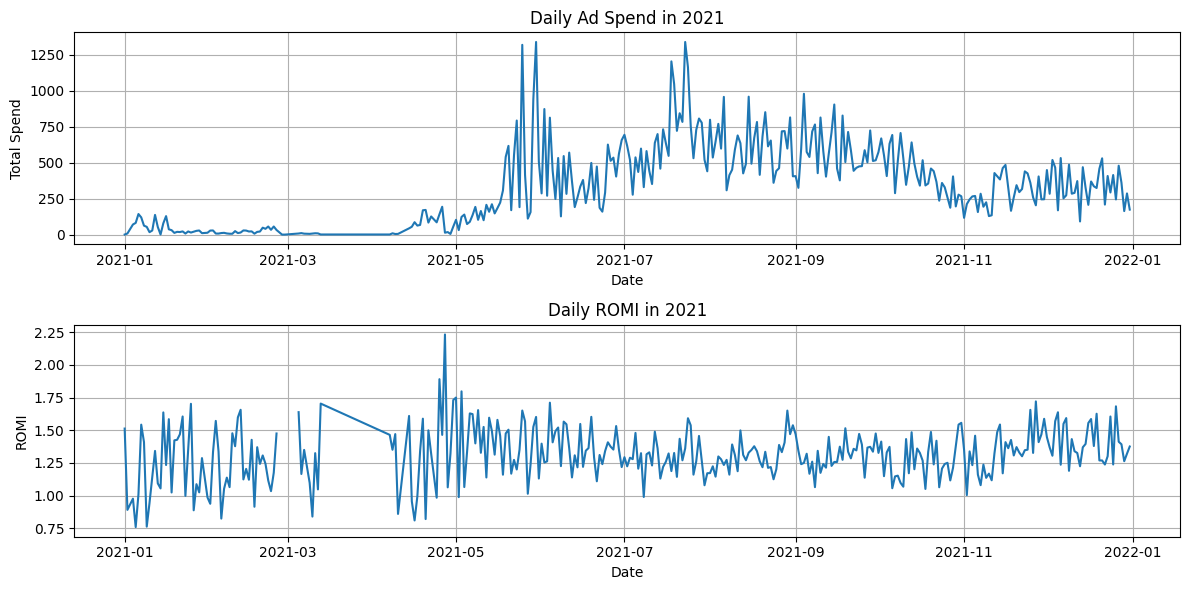

In [22]:
# 2. Зроби групування даних по дням та для згрупованих даних побудуй два графіки:
# •	Графік з щоденною сумою витрат на рекламу в 2021 році;
# •	Графік з щоденним ROMI в 2021 році.

from matplotlib import pyplot as plt
data = df.copy()

data["ad_date"] = pd.to_datetime(data["ad_date"])
data_2021 = data[data["ad_date"].dt.year == 2021]
daily_spend_2021 = data_2021.groupby("ad_date")["total_spend"].sum()
daily_romi_2021 = data_2021.groupby("ad_date")["romi"].mean()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(daily_spend_2021)
plt.title("Daily Ad Spend in 2021")
plt.xlabel("Date")
plt.ylabel("Total Spend")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(daily_romi_2021)
plt.title("Daily ROMI in 2021")
plt.xlabel("Date")
plt.ylabel("ROMI")
plt.grid(True)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

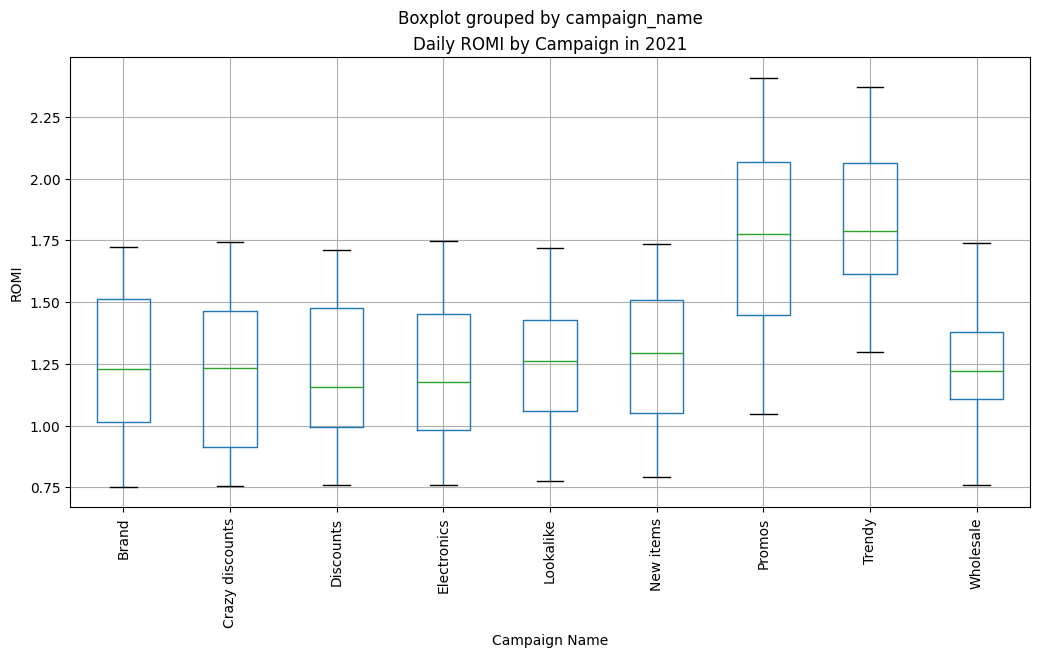

In [23]:
# 4. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

data["daily_romi"] = data["total_value"] / data["total_spend"]
data_2021 = data[data["ad_date"].dt.year == 2021]

plt.figure(figsize=(12, 6))
data_2021.boxplot(column="romi", by="campaign_name", figsize=(12,6), rot=90)
plt.title("Daily ROMI by Campaign in 2021")
plt.xlabel("Campaign Name")
plt.ylabel("ROMI")
plt.grid(True)
plt.show()

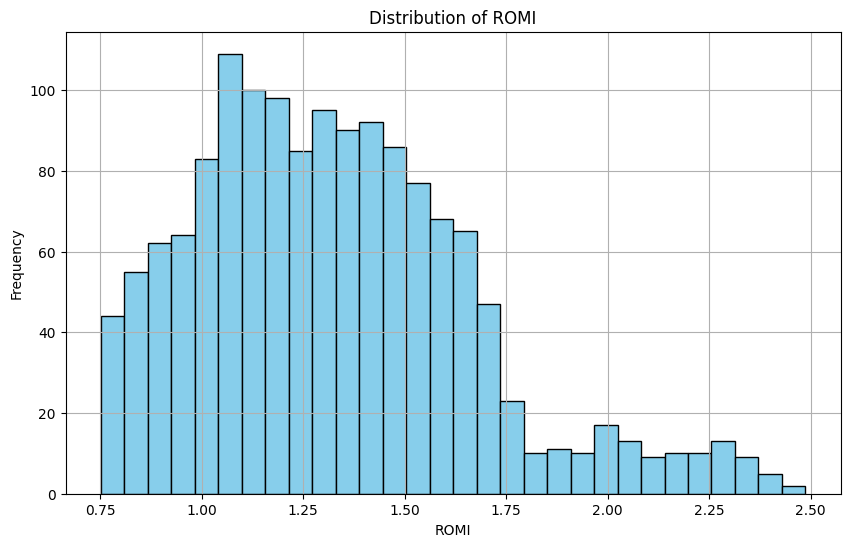

In [24]:
# 5. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

plt.figure(figsize=(10, 6))
plt.hist(data["romi"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of ROMI")
plt.xlabel("ROMI")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

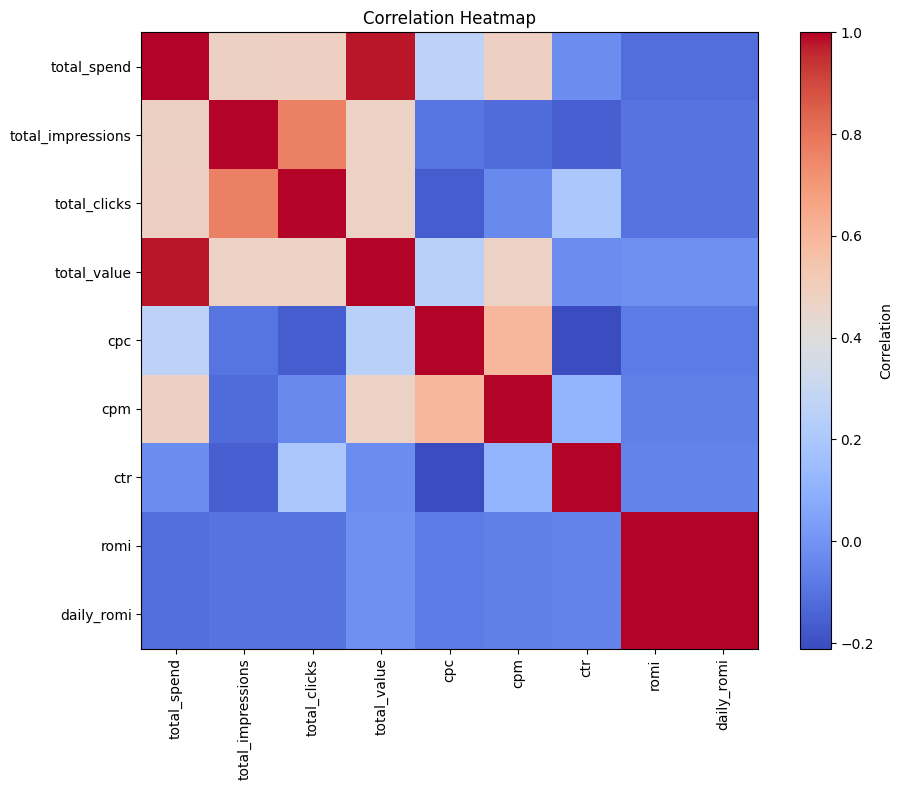

In [25]:
# 6. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

numeric_data = data.select_dtypes(include=["float64", "int64"])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.title('Correlation Heatmap')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

# Які показники мають найвищу та найнижчу кореляцію?
# Найнижча кореляція у cpc з ctr, а найвища - total_value з total_spend

# З чим корелює "total_value"?
# total_value має найбільшу кореляцію з total_spend (1), а найнижчу - з ctr (-0.2)

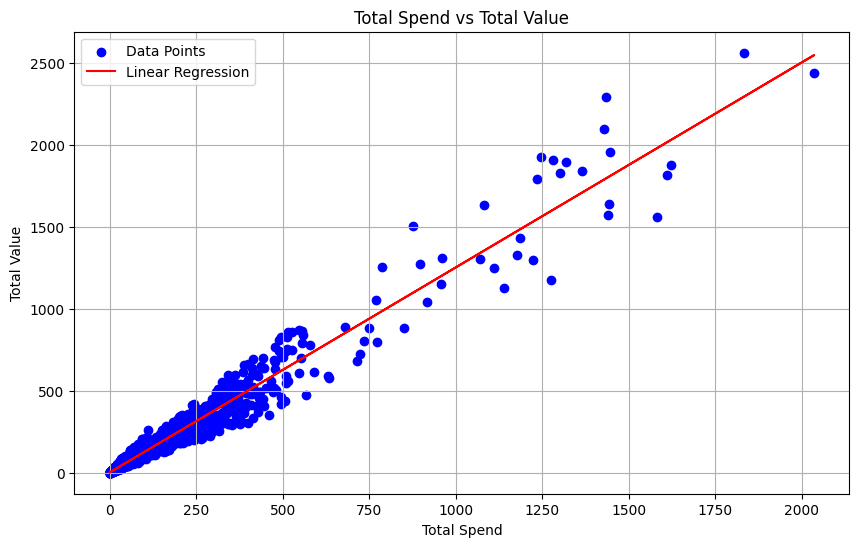

In [26]:
# 7. Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

total_spend = data["total_spend"]
total_value = data["total_value"]

slope, intercept = np.polyfit(total_spend, total_value, 1)

plt.figure(figsize=(10, 6))
plt.scatter(total_spend, total_value, color="blue", label="Data Points")
plt.plot(total_spend, slope * total_spend + intercept, color="red", label="Linear Regression")
plt.title("Total Spend vs Total Value")
plt.xlabel("Total Spend")
plt.ylabel("Total Value")
plt.legend()
plt.grid(True)
plt.show()